### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing Datasets

In [3]:
df=pd.read_csv("Housing.csv")

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Data Preprocessing

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [8]:
def encoder(x):
    if(x=='yes'):
        return 1
    elif(x=="no"):
        return 0
df["mainroad"]=df["mainroad"].apply(encoder)

In [9]:
df["guestroom"]=df["guestroom"].apply(encoder)

In [10]:
df["basement"]=df["basement"].apply(encoder)

In [11]:
df["hotwaterheating"]=df["hotwaterheating"].apply(encoder)
df["airconditioning"]=df["airconditioning"].apply(encoder)
df["prefarea"]=df["prefarea"].apply(encoder)

In [12]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


In [13]:
def encoder(x):
    if(x=='furnished'):
        return 2
    elif(x=="semi-furnished"):
        return 1
    else:
        return 0
df["furnishingstatus"]=df["furnishingstatus"].apply(encoder)

In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [15]:
y=df.iloc[:,0].values
X=df.iloc[:,1:].values

In [16]:
X.shape

(545, 12)

In [17]:
y.shape

(545,)

### Data Visualization

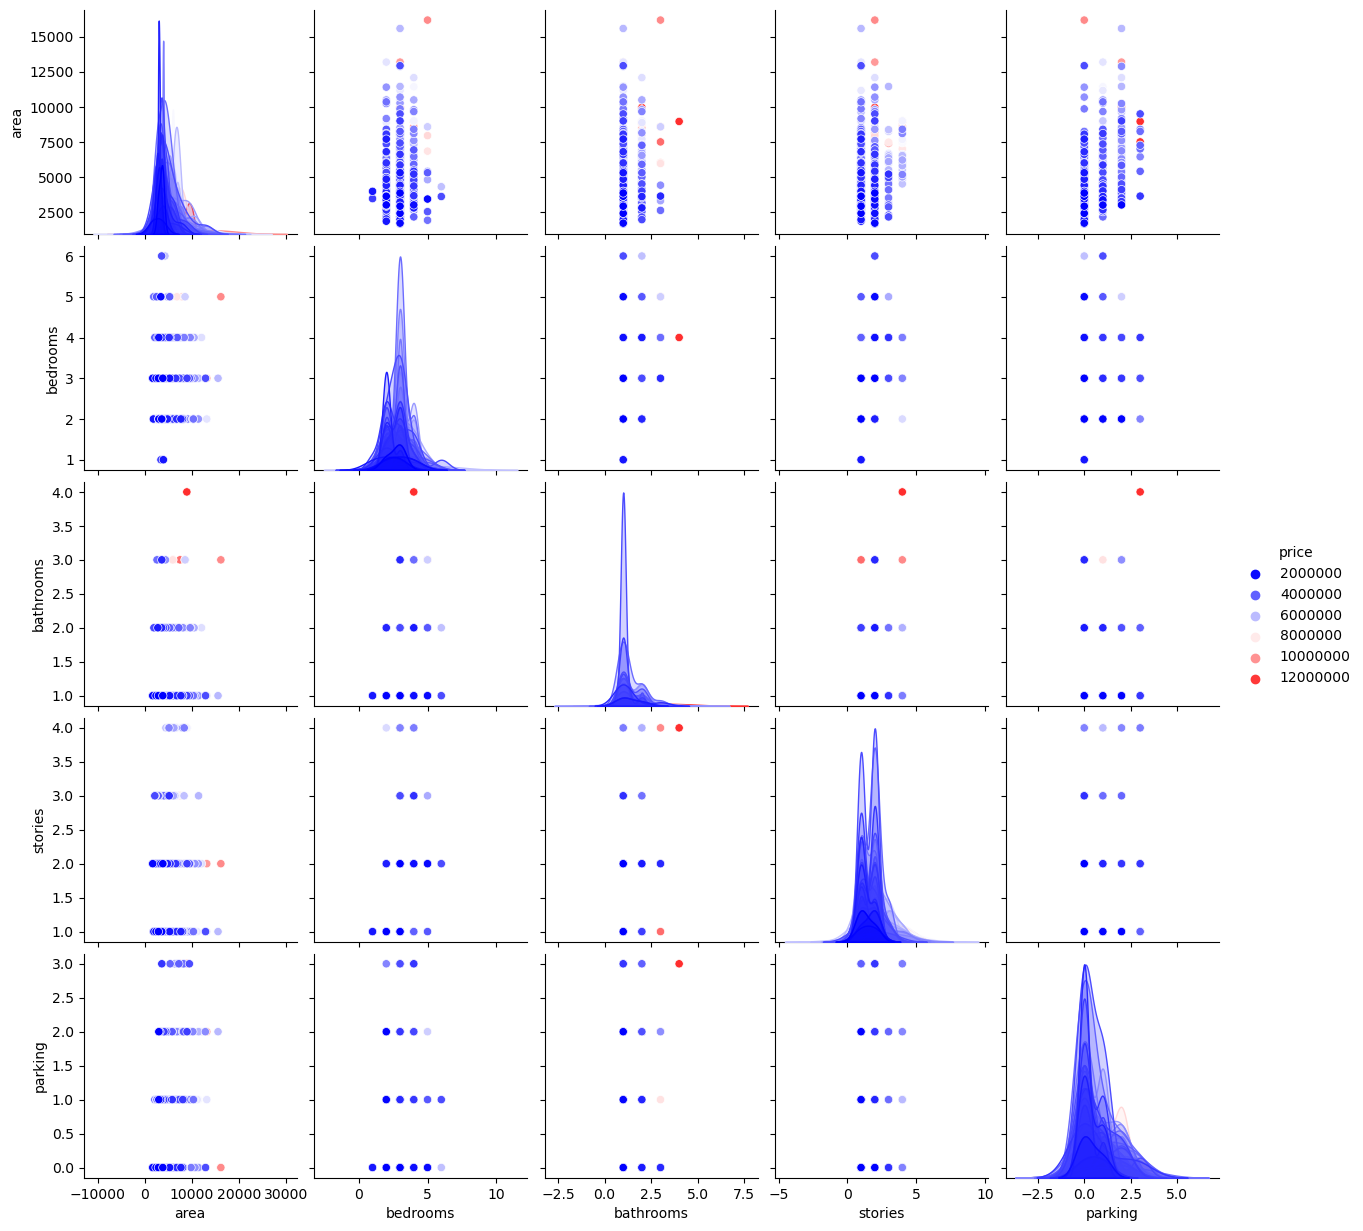

In [18]:
sns.pairplot(data=pd.read_csv("Housing.csv"),hue="price",palette='bwr')

<Axes: >

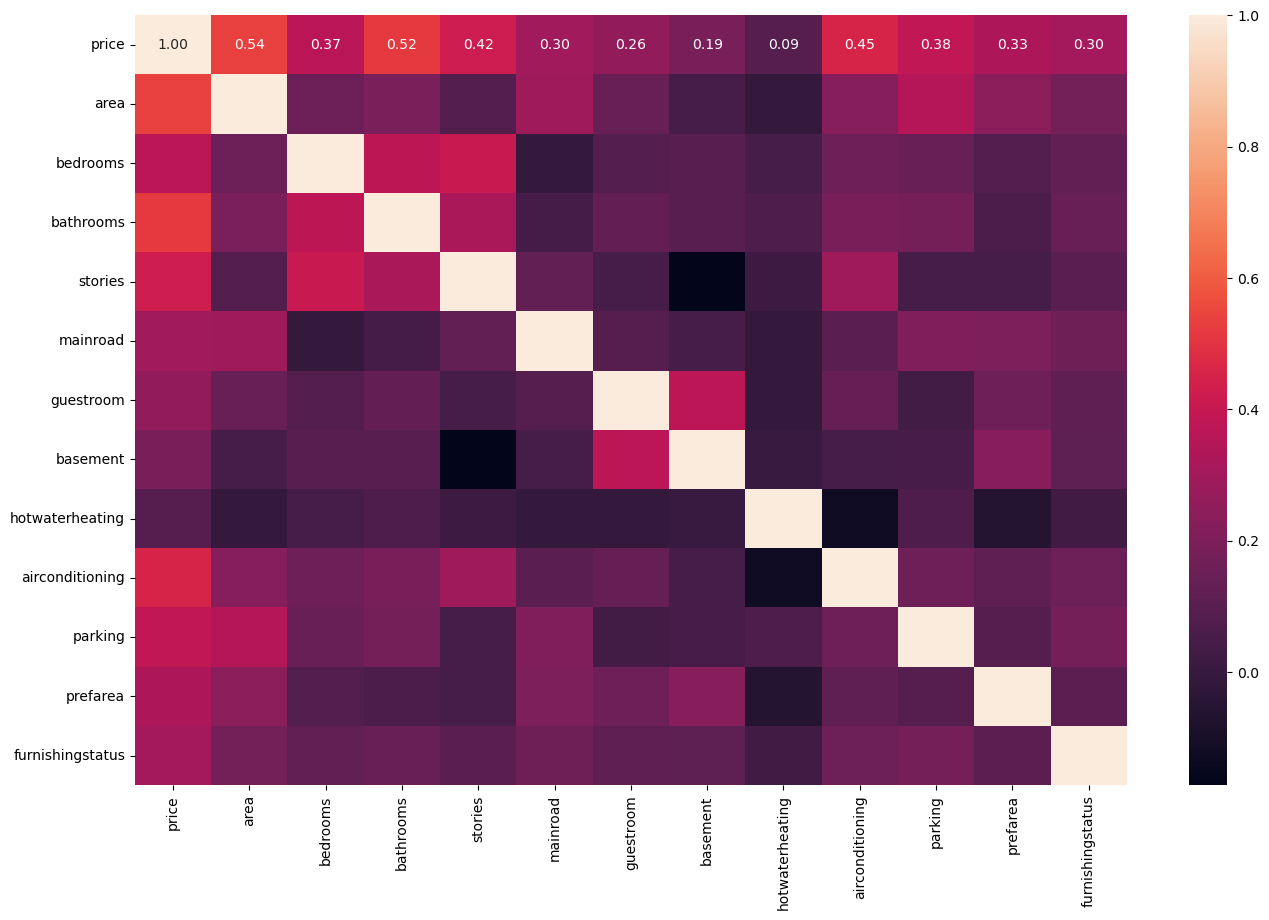

In [19]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,fmt="0.2f")

Text(0.5, 1.0, 'Count of house in different price ranges')

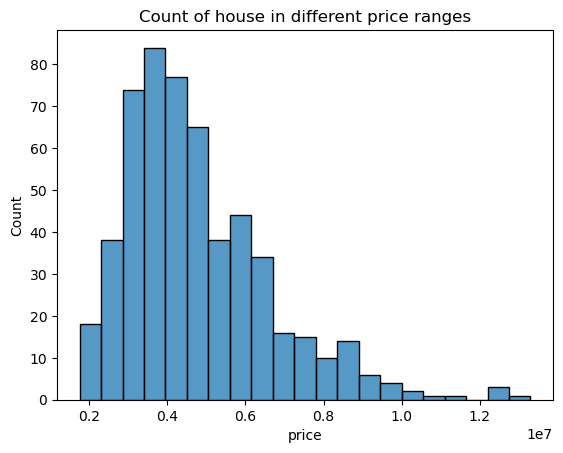

In [48]:
sns.histplot(df['price'])
plt.title("Count of house in different price ranges")

Text(0.5, 1.0, 'Area vs House price')

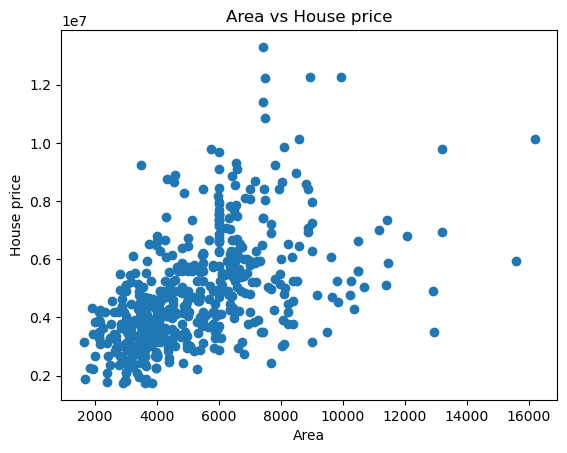

In [50]:
plt.scatter(df['area'],df['price'])
plt.xlabel("Area")
plt.ylabel("House price")
plt.title("Area vs House price")

### Model Training

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=52,test_size=0.2)

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [36]:
X_train.shape

(436, 12)

In [37]:
y_train.shape

(436,)

In [38]:
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred=lr.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### Model Evaluation

In [41]:
mean_absolute_error(y_test,y_pred)

797040.9988346646

In [42]:
mean_squared_error(y_test,y_pred)

1156854144416.4321

In [43]:
r2_score(y_test,y_pred)

0.6120623959494236

Text(0.5, 0, 'Errors')

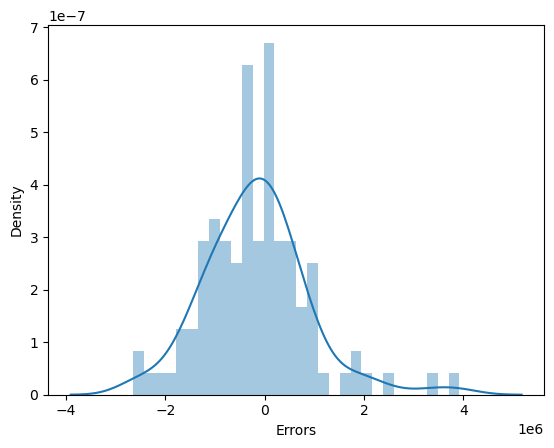

In [44]:
sns.distplot(y_test-y_pred,bins=30)
plt.xlabel("Errors")